## Basic_Graph

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    message : str

def node_a(state: AgentState) -> AgentState:
    state['message'] = "hey "+state["message"]
    return state

In [4]:
graph = StateGraph(AgentState)
graph.add_node("Name_a", node_a)
graph.set_entry_point("Name_a")
graph.set_finish_point("Name_a")
app = graph.compile()

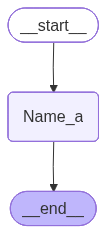

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"message":"abhay"})
result["message"]
result

{'message': 'hey abhay'}

## Learning_1

In [7]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph

In [8]:
class AgentState(TypedDict):
    message : str

def node_a(state: AgentState) -> AgentState:
    state["message"] = state["message"] + " , doing an amzing Job, Man"
    return state

In [9]:
graph = StateGraph(AgentState)
graph.add_node("hello", node_a)
graph.set_entry_point("hello")
graph.set_finish_point("hello")
app = graph.compile()

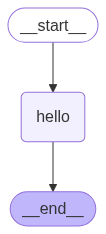

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke({"message":"Hello Abhay"})
result["message"], result

('Hello Abhay , doing an amzing Job, Man',
 {'message': 'Hello Abhay , doing an amzing Job, Man'})

## Graph 2

In [12]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [13]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    result : str

In [14]:
def process_values(state: AgentState) -> AgentState:
    state['result'] = f"hello There {state['name']}, Your Sum = {sum(state['values'])}"
    return state

In [15]:
graph = StateGraph(AgentState)
graph.add_node("Processor", process_values)
graph.set_entry_point("Processor")
graph.set_finish_point("Processor")
app = graph.compile()

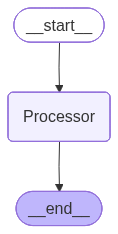

In [16]:
app

In [17]:
result = app.invoke({"values": [1, 2, 3, 4], "name":"abhay"})

In [18]:
result["name"]

'abhay'

In [19]:
result["result"]

'hello There abhay, Your Sum = 10'

In [20]:
result["values"]

[1, 2, 3, 4]

In [21]:
result

{'values': [1, 2, 3, 4],
 'name': 'abhay',
 'result': 'hello There abhay, Your Sum = 10'}

## Learning_2

In [22]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from functools import reduce
import operator

In [23]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [24]:
def process_node(state: AgentState) -> AgentState:
    if state['operation'] == '+':
        total = sum(state['values'])
    elif state['operation'] == '*':
        total = reduce(operator.mul, state['values'], 1)
    else:
        total = 0  # default if unknown operation
    state['result'] = f"Hi {state['name']}, your answer is: {total}"
    return state

In [25]:
graph = StateGraph(AgentState)
graph.add_node("Compute", process_node)
graph.set_entry_point("Compute")
graph.set_finish_point("Compute")
app = graph.compile()

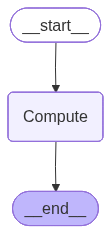

In [26]:
app

In [27]:
input_data = {"name": "Jack Sparrow", "values": [1, 2, 3, 4], "operation": "*"}
result = app.invoke(input_data)
print(result['result'])

Hi Jack Sparrow, your answer is: 24


## Graph-3

In [28]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [29]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str

In [30]:
def first_node(state: AgentState) -> AgentState:
    state['final'] = f"hello, {state['name']}"
    return state

def second_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" you are {state['age']} years old!!"
    return state

In [31]:
graph = StateGraph(AgentState)
graph.add_node("node_a", first_node)
graph.add_node("node_b", second_node)
graph.set_entry_point("node_a")
graph.add_edge("node_a", "node_b")
graph.set_finish_point("node_b")
app = graph.compile()

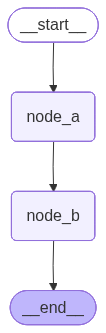

In [32]:
app

In [33]:
result = app.invoke({'name':'abhay', 'age':23})
result['final']

'hello, abhay you are 23 years old!!'

## Learn_3

In [34]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
class AgentState(TypedDict):
    name : str
    age : str
    skills : List[str]
    final : str

In [35]:
def first_node(state: AgentState) -> AgentState:
    state['final'] = f"hello, {state['name']}"
    return state

def second_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" you are {state['age']} years old!!"
    return state

def third_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" you Skills {state['skills']}"
    return state

In [36]:
graph = StateGraph(AgentState)
graph.add_node("node_a", first_node)
graph.add_node("node_b", second_node)
graph.add_node("node_c", third_node)
graph.set_entry_point("node_a")
graph.add_edge("node_a", "node_b")
graph.add_edge("node_b", "node_c")
graph.set_finish_point("node_c")
app = graph.compile()

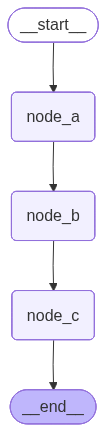

In [37]:
app

In [38]:
result = app.invoke({"age":20, "name":"abhay", "skills":['python', 'SQL', 'JS']})

In [39]:
result

{'name': 'abhay',
 'age': 20,
 'skills': ['python', 'SQL', 'JS'],
 'final': "hello, abhay you are 20 years old!! you Skills ['python', 'SQL', 'JS']"}

## Graph-4

In [40]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [41]:
class AgentState(TypedDict):
    number1:int
    number2:int
    operation:str
    finalnumber:int

In [42]:
def adder(state:AgentState) -> AgentState:
    state['finalnumber'] = state['number1'] + state['number2']
    return state

def subtracter(state:AgentState) -> AgentState:
    state['finalnumber'] = state['number1'] - state['number2']
    return state

def multiplicater(state:AgentState) -> AgentState:
    state['finalnumber'] = state['number1'] * state['number2']
    return state

def decide_next_node(state:AgentState) -> AgentState:
    if state['operation'] == "+":
        return "addtion_ops"
    elif state['operation'] == "-":
        return "subtraction_ops"
    elif state['operation'] == "*":
        return "multiplication_ops"

In [43]:
graph = StateGraph(AgentState)
graph.add_node("adder_node",adder)
graph.add_node("sub_node",subtracter)
graph.add_node("mult_node", multiplicater)
graph.add_node("router", lambda state:state)
graph.add_edge(START, "router") 
graph.add_conditional_edges(
    "router", decide_next_node,
    {
        #edge:Node
        "addtion_ops":"adder_node",
        "subtraction_ops":"sub_node",
        "multiplication_ops":"mult_node"
    }
)
graph.add_edge("adder_node",END)
graph.add_edge("sub_node",END)
graph.add_edge("mult_node", END)
app = graph.compile()

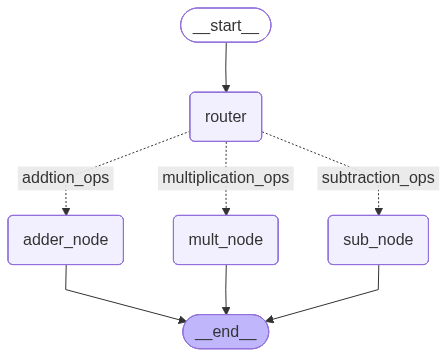

In [44]:
app

In [45]:
state_1 = AgentState(number1=10, number2=20, operation="-")
print(app.invoke(state_1))

{'number1': 10, 'number2': 20, 'operation': '-', 'finalnumber': -10}


In [46]:
state_2 = AgentState(number1=10,number2=20, operation="*")
print(app.invoke(state_2))

{'number1': 10, 'number2': 20, 'operation': '*', 'finalnumber': 200}


In [47]:
state_3 = AgentState(number1=10,number2=20, operation="+")
print(app.invoke(state_3))

{'number1': 10, 'number2': 20, 'operation': '+', 'finalnumber': 30}


## Learn_4

In [48]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [49]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber: int
    finalNumber2: int

In [50]:
def add_node(state: AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtract_node(state: AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def add_node2(state: AgentState) -> AgentState:
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtract_node2(state: AgentState) -> AgentState:
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

In [51]:
def router(state: AgentState) -> str:
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

def router2(state: AgentState) -> str:
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [52]:
graph = StateGraph(AgentState)
graph.add_node("add_node", add_node)
graph.add_node("subtract_node", subtract_node)
graph.add_node("add_node2", add_node2)
graph.add_node("subtract_node2", subtract_node2)
graph.add_node("router", lambda state: state)
graph.add_node("router2", lambda state: state)

In [53]:
graph.add_edge(START, "router")
graph.add_conditional_edges("router", router, {
    "addition_operation": "add_node",
    "subtraction_operation": "subtract_node",
})
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_conditional_edges("router2", router2, {
    "addition_operation2": "add_node2",
    "subtraction_operation2": "subtract_node2",
})
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)
app = graph.compile()
initial_state = {
    "number1": 10,
    "number2": 5,
    "number3": 7,
    "number4": 2,
    "operation": "-",
    "operation2": "+",
    "finalNumber": 0,
    "finalNumber2": 0,
}
result = app.invoke(initial_state)
print(result)

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation': '-', 'operation2': '+', 'finalNumber': 5, 'finalNumber2': 9}


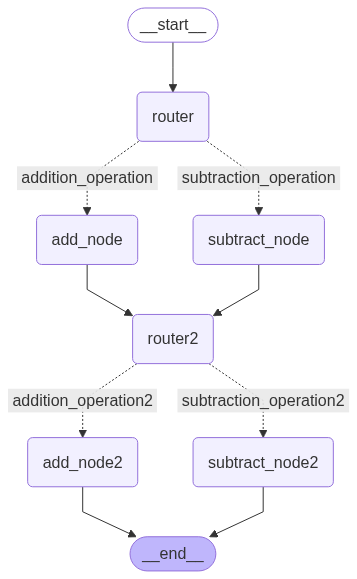

In [54]:
app

## Graph-5

In [55]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [56]:
class AgentState(TypedDict):
    name:str
    number:List[int]
    counter:int

In [65]:
def greeting_node(state: AgentState) -> AgentState:
    state['name'] = f"hi there, {state['name']}"
    state['counter'] = 0
    return state

def random_node(state: AgentState)-> AgentState:
    state['number'].append(random.randint(0,10))
    state['counter'] += 1
    return state

def should_continue(state: AgentState) -> AgentState:
    if state['counter'] < 5:
        print("ENTERING LOOP", state['counter'])
        return 'loop'
    else:
        return 'exit'
    
# greeting -> random -> random -> random -> random -> random -> END

In [66]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting","random")
graph.add_conditional_edges(
    "random", should_continue,
    {
        "loop" : "random",
        "exit" : END
    }
)
graph.set_entry_point("greeting")

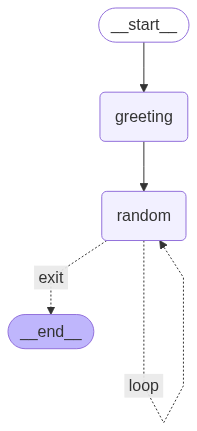

In [67]:
app = graph.compile()
app

In [75]:
app.invoke({"name":"abhay", "number":[], "counter":-1000})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'hi there, abhay', 'number': [3, 0, 6, 9, 10], 'counter': 5}

# AI Agent-1

In [77]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv

In [78]:
load_dotenv()

True

In [ ]:
class AgentState(TypedDict):
    messages: List[HumanMessage]

In [83]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-pro",
    temperature=0.2,
)

In [84]:
def process(state: AgentState) -> AgentState:
    response = llm.invoke(state['messages'])
    print(f"AI Response: {response.content}")
    return state

In [86]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()

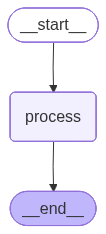

In [87]:
agent

In [88]:
user_input = input("Enter: ")
agent.invoke({"messages":[HumanMessage(content=user_input)]})

AI Response: Hello! I'm doing very well, thank you for asking.

How can I help you today?


{'messages': [HumanMessage(content='hello how are you', additional_kwargs={}, response_metadata={})]}

In [89]:
user_input = input("Enter: ")
while user_input != "exit":
    agent.invoke({"messages":[HumanMessage(content=user_input)]})
    user_input = input("Enter: ")

AI Response: Hello! How can I help you today?
AI Response: Of course! It's a great question. At my core, I am a large language model, trained by Google. Think of me as a very complex pattern-matching and prediction engine, designed to understand and generate human-like text.

Here's a breakdown of what I am capable of, from the simple to the complex:

### 1. Understanding and Processing Information

*   **Answering Questions:** I can answer a vast range of questions, from simple facts ("What is the capital of Mongolia?") to complex, abstract concepts ("Explain the theory of general relativity in simple terms.").
*   **Summarizing:** You can give me a long article, a research paper, a book chapter, or a conversation transcript, and I can condense it into key points.
*   **Explaining:** I can break down difficult topics (like quantum computing, blockchain, or economic theories) into easier-to-understand language.
*   **Extracting Information:** I can pull specific data points from a bloc

## AI Agent-2

In [90]:
import os
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv

In [91]:
load_dotenv()

True

In [93]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

In [94]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-pro",
    temperature=0.2,
)

In [95]:
def process(state: AgentState) -> AgentState:
    response = llm.invoke(state['messages'])
    state['messages'].append(AIMessage(content=response.content))
    print(f"AI :  {response.content}")
    return state

In [96]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()

In [99]:
conversation_history = []
user_input = input("Enter: ")
while user_input != "exit":
    conversation_history.append(HumanMessage(content=user_input))
    result=agent.invoke({"messages": conversation_history})
    print(result["messages"])
    conversation_history = result["messages"]
    user_input = input("Enter: ")

AI :  Hello! How can I help you today?
[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={})]
AI :  That is one of the most profound questions a person can ask. There's no single answer, as it's been debated by philosophers, scientists, spiritual leaders, and everyday people for thousands of years.

We can look at the question in a few different ways:

### 1. The Scientific / Biological Answer

From a biological perspective, life is a characteristic that distinguishes physical entities that have biological processes (like signaling and self-sustaining processes) from those that do not. An organism is considered "alive" if it has most of these traits:

*   **Organization:** Made of one or more cells.
*   **Metabolism:** Uses energy to maintain itself.
*   **Homeostasis:** Maintains a stable internal environment.
*   **Growth:** Increases in size over time.
*   **Reproduct